<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 1. OpenCV Basis**
# Section 4. 영상의 기하학 처리(2) 모폴로지 변환

### _Objective_
1. **모폴로지 변환** : 모폴로지 변환에 대해 알아봅니다.<br>
2. **모폴로지 연산** : 모폴로지 변환을 바탕으로 다양한 모폴로지 연산에 대해 알아봅니다.

In [ ]:
# 영상처리에 있어서 핵심적인 matplotlib과 opencv , numpy 가져오기
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
if not os.path.exists("mophology_example.jpg"):
    !wget http://opencv-python-tutroals.readthedocs.io/en/latest/_images/j.png
    os.rename("j.png","mophology_example.jpg")
if not os.path.exists("opening_example.jpg"):    
    !wget https://i.imgur.com/HCtr4VQ.png
    os.rename("HCtr4VQ.png","opening_example.jpg")  
if not os.path.exists("closing_example.jpg"):    
    !wget https://i.imgur.com/gQWkM5q.png
    os.rename("gQWkM5q.png","closing_example.jpg")

URL transformed to HTTPS due to an HSTS policy
--2019-12-26 15:27:55--  https://opencv-python-tutroals.readthedocs.io/en/latest/_images/j.png
Resolving opencv-python-tutroals.readthedocs.io... 104.208.221.96
Connecting to opencv-python-tutroals.readthedocs.io|104.208.221.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1126 (1.1K) [image/png]
Saving to: 'j.png'

j.png               100%[===================>]   1.10K  --.-KB/s    in 0s      

2019-12-26 15:27:56 (107 MB/s) - 'j.png' saved [1126/1126]

--2019-12-26 15:27:56--  https://i.imgur.com/HCtr4VQ.png
Resolving i.imgur.com... 151.101.24.193
Connecting to i.imgur.com|151.101.24.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13113 (13K) [image/png]
Saving to: 'HCtr4VQ.png'

HCtr4VQ.png         100%[===================>]  12.81K  --.-KB/s    in 0s      

2019-12-26 15:27:57 (26.3 MB/s) - 'HCtr4VQ.png' saved [13113/13113]

--2019-12-26 15:27:57--  https://i.imgur.com/gQWkM5q.p

# \[ 1. Mophology 변환\]



## 1. 구조 요소 (Structuring element)


### (1) 직사각형 구조 요소



In [ ]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

### (2) 타원형 구조 요소


In [ ]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,5))

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

### (3) 십자가형 구조 요소



In [ ]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,10), anchor=(2,3))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

## 2. 팽창과 침식



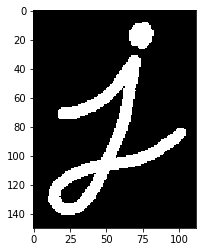

In [ ]:
# 구조 요소 설정
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

image = cv2.imread("./mophology_example.jpg", 0)
plt.imshow(image, cmap='gray')
plt.show()

### (1) 팽창(dilation)



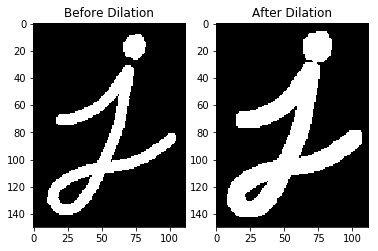

In [ ]:
dilation = cv2.dilate(image, kernel, iterations = 1)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Before Dilation')
plt.subplot(122)
plt.imshow(dilation, cmap='gray')
plt.title('After Dilation')
plt.show()

### (2) 침식(erosion)


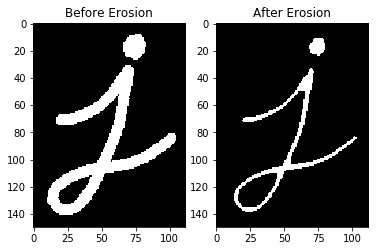

In [ ]:
erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Before Erosion')
plt.subplot(122)
plt.imshow(erosion, cmap='gray')
plt.title('After Erosion')
plt.show()

# \[ 2. Mophology 연산\]


## 1. 다양한 모폴로지 연산



### (1) 열림 연산 (Opening)

$$OPENING~=~DILATE(ERODE(IMG))$$

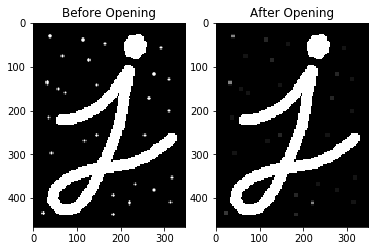

In [ ]:
opening_image = cv2.imread("opening_example.jpg", 0)
opening = cv2.morphologyEx(opening_image, cv2.MORPH_OPEN, kernel)

plt.subplot(121)
plt.imshow(opening_image, cmap='gray')
plt.title('Before Opening')
plt.subplot(122)
plt.imshow(opening, cmap='gray')
plt.title('After Opening')
plt.show()

### (2) 닫힘 연산 (Closing)

$$CLOSING~=~ERODE(DILATE(IMG))$$

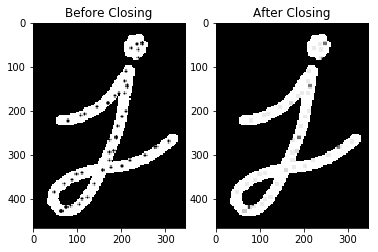

In [ ]:
closing_image = cv2.imread("closing_example.jpg", 0)
closing = cv2.morphologyEx(closing_image, cv2.MORPH_CLOSE, kernel)

plt.subplot(121)
plt.imshow(closing_image, cmap='gray')
plt.title('Before Closing')
plt.subplot(122)
plt.imshow(closing, cmap='gray')
plt.title('After Closing')
plt.show()

### (3) Morphological Gradient (Gradient 연산)

$$GRADIENT~=~DILATE(IMG)~-ERODE(IMG)$$

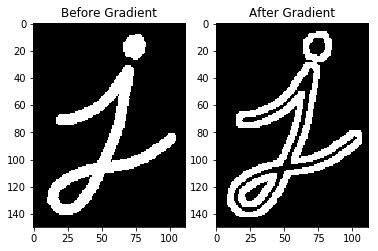

In [ ]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Before Gradient')
plt.subplot(122)
plt.imshow(gradient, cmap='gray')
plt.title('After Gradient')
plt.show()

### (4) Top Hat 연산
$$TOPHAT~=~IMG~-OPENING(IMG)$$

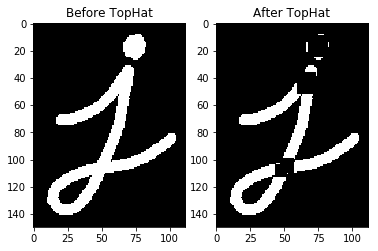

In [ ]:
# 결과를 더 확실하게 확인하기 위해 (9,9) kernel을 사용했습니다.
tophat_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, tophat_kernel)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Before TopHat')
plt.subplot(122)
plt.imshow(tophat, cmap='gray')
plt.title('After TopHat')
plt.show()

### (5) Black Hat 연산
연산은 원본 이미지에서 주변보다 어두운 영역만 강조합니다.
$$BLACKHAT~=~CLOSING(IMG)~-IMG$$

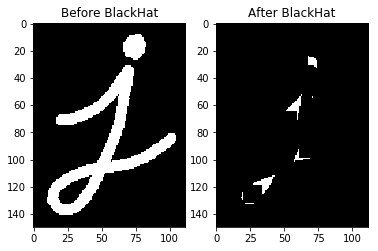

In [ ]:
# 결과를 더 확실하게 확인하기 위해 (9,9) kernel을 사용했습니다.
blackhat_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, blackhat_kernel)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Before BlackHat')
plt.subplot(122)
plt.imshow(blackhat, cmap='gray')
plt.title('After BlackHat')
plt.show()